# Create a linear regression model in Python  to predict the CTC/Salary of new hires from the data provided.

# Cost to Company (CTC) refers to the cost incurred by the company in a year for employing a staff member in the organization. It takes into consideration all the additional benefits that an employee in a company receives apart from their salary.

# Import neccessary libaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import train dataset

In [2]:
train_data = pd.read_excel("C:\\Users\\KAMAL PAUL\\Desktop\\Data_file (1).xlsx", skiprows=2)
refine_data=train_data

# Clean train dataset

In [3]:
refine_data.drop('S.No.', axis=1, inplace = True)

In [4]:
refine_data["CTC"] = train_data["CTC"].apply(np.int64)
refine_data 

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406
1,Tier 2,Executive,Metro,57081,1,84,18,68005
2,Tier 2,Executive,Metro,60347,2,52,28,76764
3,Tier 3,Executive,Metro,49010,2,81,33,82092
4,Tier 3,Executive,Metro,57879,4,74,32,73878
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044


# Get information about the train dataset

In [5]:
refine_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406
1,Tier 2,Executive,Metro,57081,1,84,18,68005
2,Tier 2,Executive,Metro,60347,2,52,28,76764
3,Tier 3,Executive,Metro,49010,2,81,33,82092
4,Tier 3,Executive,Metro,57879,4,74,32,73878


In [6]:
refine_data.tail()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
1333,Tier 3,Executive,Metro,59661,4,68,50,69712
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044
1337,Tier 3,Manager,Non-Metro,51820,1,47,61,83346


In [7]:
refine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   int64 
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 83.8+ KB


In [8]:
refine_data.describe() 

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75458.846786
std,6685.600553,1.123502,14.894696,14.049960,12551.284470
min,36990.000000,1.000000,35.000000,18.000000,53020.000000
25%,50547.000000,2.000000,47.000000,27.000000,66904.750000
50%,55293.500000,3.000000,60.000000,39.000000,73112.500000
75%,60150.500000,4.000000,73.000000,51.000000,80746.500000
max,77911.000000,4.000000,85.000000,64.000000,123416.000000


# Turn Categorical Variable into Numerical Variable

In [9]:
print(refine_data['College'].unique())
print(refine_data['Role'].unique())
print(refine_data['City type'].unique())

['Tier 1' 'Tier 2' 'Tier 3']
['Manager' 'Executive']
['Non-Metro' 'Metro']


In [10]:
refine_data = pd.concat([refine_data, pd.get_dummies(refine_data['College'])], axis=1)
refine_data = pd.concat([refine_data, pd.get_dummies(refine_data['Role'])], axis=1)
refine_data = pd.concat([refine_data, pd.get_dummies(refine_data['City type'])], axis=1)

In [11]:
refine_data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 1,Tier 2,Tier 3,Executive,Manager,Metro,Non-Metro
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406,1,0,0,0,1,0,1
1,Tier 2,Executive,Metro,57081,1,84,18,68005,0,1,0,1,0,1,0
2,Tier 2,Executive,Metro,60347,2,52,28,76764,0,1,0,1,0,1,0
3,Tier 3,Executive,Metro,49010,2,81,33,82092,0,0,1,1,0,1,0
4,Tier 3,Executive,Metro,57879,4,74,32,73878,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712,0,0,1,1,0,1,0
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298,1,0,0,1,0,0,1
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397,0,1,0,1,0,0,1
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044,1,0,0,1,0,0,1


# Determine the correlation between the variable (CTC) to other variables

In [12]:
refine_data.corr()["CTC"] 

Previous CTC            0.270259
Previous job changes    0.007518
Graduation marks       -0.017557
Exp (Months)            0.301570
CTC                     1.000000
Tier 1                  0.165249
Tier 2                 -0.041814
Tier 3                 -0.149194
Executive              -0.625434
Manager                 0.625434
Metro                   0.211258
Non-Metro              -0.211258
Name: CTC, dtype: float64

# Plot Pairplot Using Seaborn Library to show relationship and distribution among variables

In [13]:
sns.set_style('darkgrid')

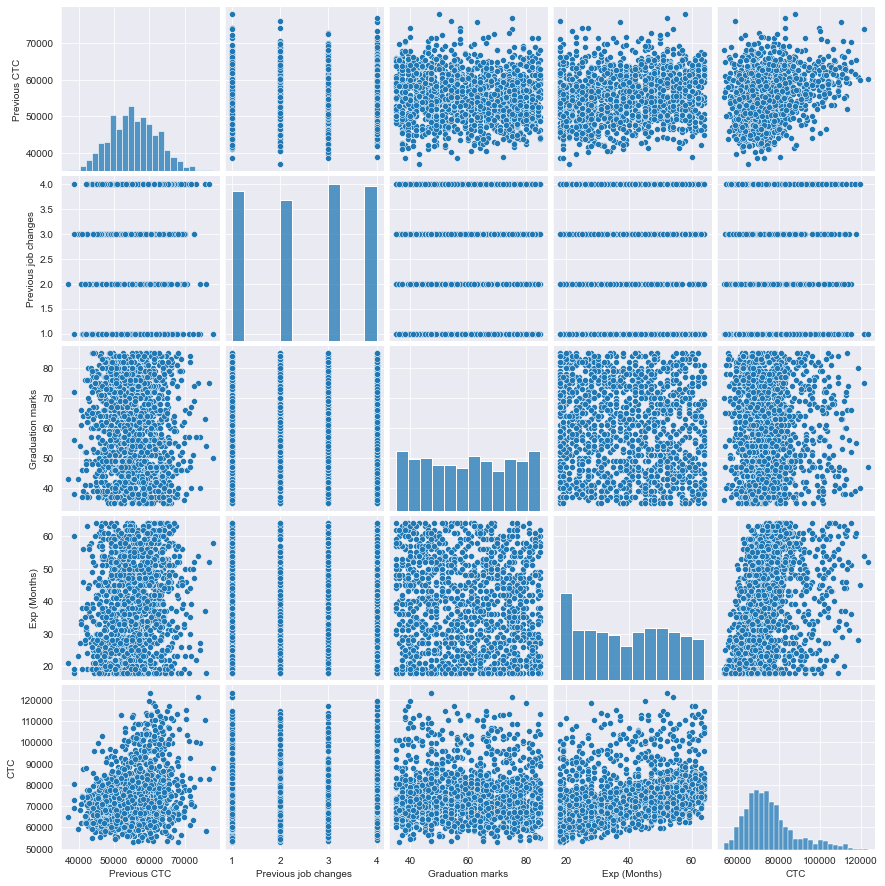

In [14]:
sns.pairplot(train_data, vars=["Previous CTC", "Previous job changes", "Graduation marks", "Exp (Months)", "CTC"])

# Distribution of each variable in relation to CTC

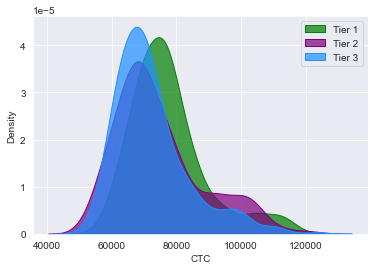

In [15]:
sns.kdeplot(train_data.loc[train_data['College']  == "Tier 1", "CTC"], shade=True, color="g", label='Tier 1', alpha=.7 )
sns.kdeplot(train_data.loc[train_data['College']  == "Tier 2", "CTC"], shade=True, color="purple", label='Tier 2', alpha=.7)
sns.kdeplot(train_data.loc[train_data['College']  == "Tier 3", "CTC"], shade=True, color="dodgerblue", label='Tier 3', alpha=.7)
plt.legend()
plt.show()

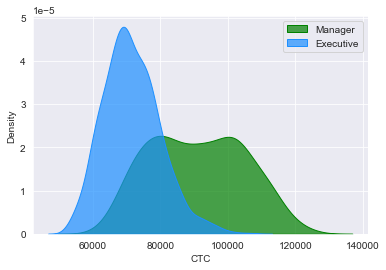

In [16]:
sns.kdeplot(train_data.loc[train_data['Role']  == "Manager", "CTC"], shade=True, color="g", label='Manager', alpha=.7 )
sns.kdeplot(train_data.loc[train_data['Role']  == "Executive", "CTC"], shade=True, color="dodgerblue", label='Executive', alpha=.7)
plt.legend()
plt.show()

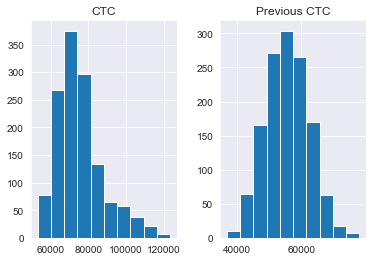

In [17]:
visuals = train_data [['CTC', 'Previous CTC']]
visuals.hist()
plt.show()

<BarContainer object of 1338 artists>

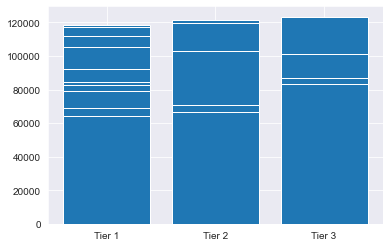

In [18]:
plt.bar(train_data['College'],train_data['CTC'])

<BarContainer object of 1338 artists>

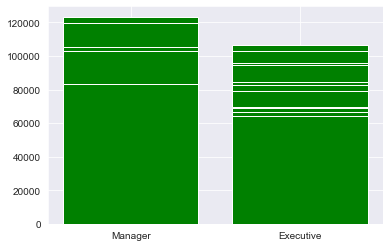

In [19]:
plt.bar(train_data['Role'],train_data['CTC'], color = "g")

C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City type', ylabel='CTC'>

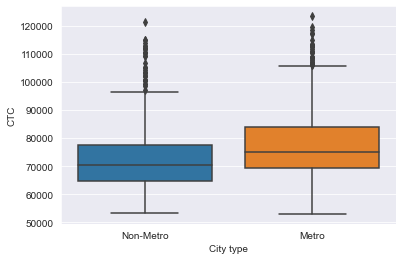

In [20]:
sns.boxplot(train_data['City type'], train_data['CTC'])

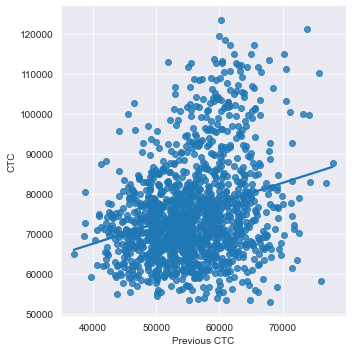

In [21]:
#there seems to upward projection in linear relationship between the Previous CTC and current Cost to Company(CTC)/Salary
sns.lmplot(x="Previous CTC", y="CTC", data=train_data, fit_reg=True, ci=None)

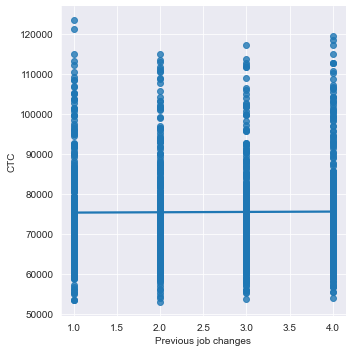

In [265]:
#there is no linear relationship between the no of previous job changes and current Cost to Company /Salary
sns.lmplot(x="Previous job changes", y="CTC", data=train_data, fit_reg=True, ci=None)

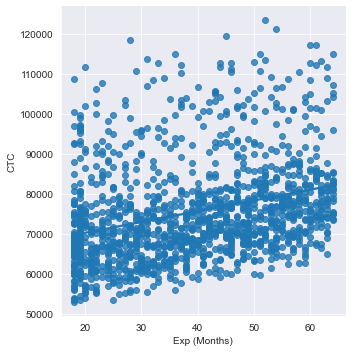

In [263]:
# As the EXP(month) increases the cost to company/ salary increases as such there seems to be  linear relationship between the two variables
sns.lmplot(x="Exp (Months)", y="CTC", data=train_data, fit_reg=True, ci=None)

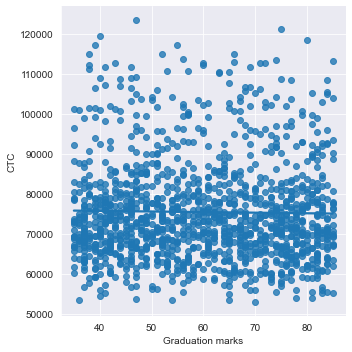

In [264]:
#there seems to be a downward projection in linear relationship between the graduation marks and Cost to Company/Salary
sns.lmplot(x="Graduation marks", y="CTC", data=train_data, fit_reg=True, ci=None)

# Import Test Dataset

In [24]:
test_data = pd.read_excel("C:\\Users\\KAMAL PAUL\\Desktop\\Test_data_file.xlsx")

In [25]:
test_data 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Test data

In [26]:
test_data = test_data.loc[:, ~test_data.columns.str.contains('^Unnamed')]

In [27]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [28]:
test_data = test_data.loc[:, ~test_data.columns.str.contains('^Predicted CTC')]

In [29]:
test_data.head() 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729


In [30]:
test_data["Actual CTC"] = test_data["Actual CTC"].apply(np.int64)
test_data 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044


# Get Information about the test dataset

In [31]:
test_data.head() 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878


In [32]:
test_data.tail() 

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044
1337,Tier 3,Manager,Non-Metro,0,0,1,0,51820,1,47,61,83346


In [33]:
test_data.shape 

(1338, 12)

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   College_T1            1338 non-null   int64 
 4   College_T2            1338 non-null   int64 
 5   Role_Manager          1338 non-null   int64 
 6   City_Metro            1338 non-null   int64 
 7   previous CTC          1338 non-null   int64 
 8   previous job changes  1338 non-null   int64 
 9   Graduation marks      1338 non-null   int64 
 10  Exp                   1338 non-null   int64 
 11  Actual CTC            1338 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 125.6+ KB


In [35]:
test_data.describe()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.485052,0.272048,0.204783,0.505232,55581.762332,2.525411,59.890882,39.207025,75458.846786
std,0.499963,0.445181,0.403694,0.500160,6685.600553,1.123502,14.894696,14.049960,12551.284470
min,0.000000,0.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000
25%,0.000000,0.000000,0.000000,0.000000,50547.000000,2.000000,47.000000,27.000000,66904.750000
50%,0.000000,0.000000,0.000000,1.000000,55293.500000,3.000000,60.000000,39.000000,73112.500000
75%,1.000000,1.000000,0.000000,1.000000,60150.500000,4.000000,73.000000,51.000000,80746.500000
max,1.000000,1.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000


# Import Libaries from sklearn

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Train Model

In [37]:
xtrain = train_data[['Exp (Months)', 'Previous CTC', 'Graduation marks']]
xtest = test_data[['Exp', 'previous CTC', 'Graduation marks']]
Xtrain = scaler.fit_transform(xtrain)
Xtest = scaler.fit_transform(xtest)
Ytrain = train_data['CTC']
Ytest = test_data['Actual CTC']

# Fit Model

In [38]:
regr.fit(Xtrain,Ytrain)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [3441.05242176 2992.41190699  116.02918234]
Intercept: 75458.84678624813


# Predicted CTC

In [39]:
Ytest_predict = regr.predict(Xtest)
predicted_value = pd.DataFrame({'Actual CTC': Ytest, 'Predicted CTC':Ytest_predict})
print(predicted_value)

      Actual CTC  Predicted CTC
0          71406   70529.279863
1          68005   71122.151544
2          76764   74785.227139
3          82092   71160.023940
4          73878   74831.631985
...          ...            ...
1333       69712   79992.905875
1334       69298   69482.071589
1335       66397   73017.082756
1336       64044   70003.874121
1337       83346   79013.462659

[1338 rows x 2 columns]


# Model Evaluation

Residual sum of squares: 134275977.67
Root Mean Squared Error: 11587.751191357169
Variance score: 0.15
R2:  0.14700461056539949


C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


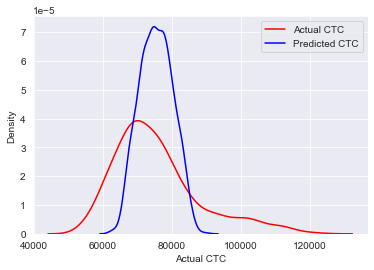

C:\Users\KAMAL PAUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


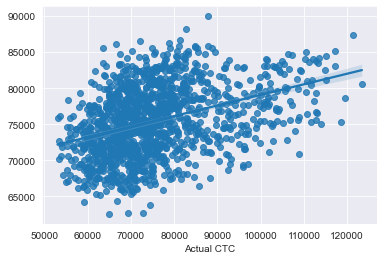

In [40]:
MSE = np.mean((Ytest_predict - Ytest)  ** 2)
print("Residual sum of squares: %.2f" % MSE)
print('Root Mean Squared Error:', np.sqrt(MSE))
print('Variance score: %.2f' % regr.score(Xtest, Ytest))
print("R2: ",r2_score(Ytest, Ytest_predict))

ax1 = sns.distplot(Ytest, hist=False, color="r", label="Actual CTC")
sns.distplot(Ytest_predict, hist=False, color="b", label="Predicted CTC", ax=ax1)
plt.legend()
plt.show()

ax = sns.regplot(Ytest, Ytest_predict)

# Test model using Mean Absolute Error

In [42]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(Ytest, Ytest_predict)

error

8861.567704548943

In [44]:
#check standard deviation of test dataset and make sure the mean absolute error is below it, as this gives us our prediction a bit of validity 
test_data.describe()["Actual CTC"]

count      1338.000000
mean      75458.846786
std       12551.284470
min       53020.000000
25%       66904.750000
50%       73112.500000
75%       80746.500000
max      123416.000000
Name: Actual CTC, dtype: float64

# Export the final dataset

In [45]:
Final_Output = pd.concat([test_data,pd.DataFrame(Ytest_predict,columns=["Predicted CTC"])], axis=1)
Final_Output

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406,70529.279863
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005,71122.151544
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764,74785.227139
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092,71160.023940
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878,74831.631985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712,79992.905875
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298,69482.071589
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397,73017.082756
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044,70003.874121


In [46]:
new_dataset = "dataset_with_predicted_CTC.xlsx"
Final_Output.to_excel(new_dataset)
print("Dataset has exported to excel file")

Dataset has exported to excel file
